In [1]:
from google.colab import drive

In [2]:
drive.mount(r'/content/drive')

Mounted at /content/drive


In [9]:
!pip install pydot
!pip install networkx
!pip install graphviz

In [4]:
import pandas as pd

class Word:
    def __init__(self, text, lemma, pos):
        self.text = text
        self.lemma = lemma
        self.pos = pos
        self.head = None
        self.dep = None
        self.children = []

def load_parse_result(json_file):
    data = pd.read_json(json_file)

    sentences = []
    for sentence_data in data['sentences']:
        words_data = sentence_data['tokens']
        dependencies_data = sentence_data['enhancedDependencies']

        words = [Word(word_data['word'], word_data['lemma'], word_data['pos']) for word_data in words_data]

        for dep_data in dependencies_data:
            gov_idx = dep_data['governor'] - 1
            dep_idx = dep_data['dependent'] - 1
            dep_type = dep_data['dep']

            words[dep_idx].head = words[gov_idx]
            words[dep_idx].dep = dep_type
            words[gov_idx].children.append(words[dep_idx])

        sentences.append(words)

    return sentences

parse_result = load_parse_result('/content/drive/MyDrive/data/ai.en.txt.json')

first_sentence = parse_result[0]
print([word.text for word in first_sentence])
print([word.head.text for word in first_sentence])
print([word.dep for word in first_sentence])

['In', 'computer', 'science', ',', 'artificial', 'intelligence', '-LRB-', 'AI', '-RRB-', ',', 'sometimes', 'called', 'machine', 'intelligence', ',', 'is', 'intelligence', 'demonstrated', 'by', 'machines', ',', 'in', 'contrast', 'to', 'the', 'natural', 'intelligence', 'displayed', 'by', 'humans', 'and', 'animals', '.']
['science', 'science', 'called', 'called', 'intelligence', 'called', 'AI', 'intelligence', 'AI', 'intelligence', 'called', '.', 'intelligence', 'called', 'called', 'called', 'is', 'intelligence', 'machines', 'demonstrated', 'intelligence', 'contrast', 'intelligence', 'intelligence', 'intelligence', 'intelligence', 'contrast', 'intelligence', 'humans', 'displayed', 'humans', 'humans', 'called']
['case', 'compound', 'nmod:in', 'punct', 'amod', 'nsubj', 'punct', 'appos', 'punct', 'punct', 'advmod', 'ROOT', 'compound', 'xcomp', 'punct', 'advcl', 'nsubj', 'acl', 'case', 'nmod:by', 'punct', 'case', 'nmod:in', 'case', 'det', 'amod', 'nmod:to', 'acl', 'case', 'nmod:by', 'cc', 'co

In [5]:
root_words = [word.text for sentence in parse_result for word in sentence if word.dep == 'ROOT']

print("Root words for each sentence:")

for i, root_word in enumerate(root_words, start=1):
    print(f"Sentence {i}: {root_word}")

Root words for each sentence:
Sentence 1: called
Sentence 2: define
Sentence 3: used
Sentence 4: removed
Sentence 5: says
Sentence 6: excluded
Sentence 7: classified
Sentence 8: founded
Sentence 9: divided
Sentence 10: based
Sentence 11: based
Sentence 12: include
Sentence 13: goals
Sentence 14: include
Sentence 15: used
Sentence 16: draws
Sentence 17: founded
Sentence 18: raises
Sentence 19: explored
Sentence 20: consider
Sentence 21: believe
Sentence 22: experienced
Sentence 23: appeared
Sentence 24: raised
Sentence 25: study
Sentence 26: led
Sentence 27: known
Sentence 28: led
Sentence 29: Turing
Sentence 30: born
Sentence 31: became
Sentence 32: produced
Sentence 33: established
Sentence 34: optimistic
Sentence 35: agreed
Sentence 36: failed
Sentence 37: slowed
Sentence 38: called
Sentence 39: revived
Sentence 40: reached
Sentence 41: inspired
Sentence 42: fell
Sentence 43: enabled
Sentence 44: book
Sentence 45: began
Sentence 46: due
Sentence 47: became
Sentence 48: defeated
Sente

In [6]:
verb_noun_pairs = []
for sentence in parse_result:
    for word in sentence:
        if word.pos.startswith('VB'):
            verb = word.text
            for child in word.children:
                if child.pos.startswith('NN'):
                    noun = child.text
                    verb_noun_pairs.append((verb, noun))

print("Verb governors and their noun dependents:")

for verb, noun in verb_noun_pairs:
    print(f"Verb: {verb}, Noun: {noun}")

Verb governors and their noun dependents:
Verb: called, Noun: science
Verb: called, Noun: intelligence
Verb: called, Noun: intelligence
Verb: is, Noun: intelligence
Verb: demonstrated, Noun: machines
Verb: displayed, Noun: humans
Verb: displayed, Noun: animals
Verb: define, Noun: textbooks
Verb: define, Noun: field
Verb: define, Noun: study
Verb: perceives, Noun: device
Verb: perceives, Noun: environment
Verb: takes, Noun: device
Verb: takes, Noun: actions
Verb: maximize, Noun: actions
Verb: maximize, Noun: chance
Verb: achieving, Noun: goals
Verb: used, Noun: intelligence
Verb: describe, Noun: intelligence
Verb: describe, Noun: machines
Verb: mimic, Noun: machines
Verb: mimic, Noun: functions
Verb: associate, Noun: functions
Verb: associate, Noun: humans
Verb: associate, Noun: mind
Verb: solving, Noun: problem
Verb: become, Noun: machines
Verb: require, Noun: intelligence
Verb: removed, Noun: tasks
Verb: removed, Noun: definition
Verb: known, Noun: effect
Verb: says, Noun: quip
Verb: 

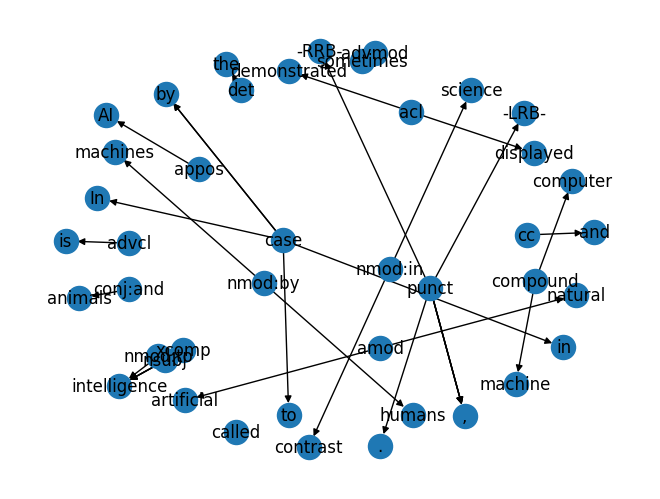

In [10]:
import pydot
import networkx
import matplotlib.pyplot as plt

def visualize_dependency_tree(sentence):
    graph = pydot.Dot(graph_type='digraph')

    for word in sentence:
        graph.add_node(pydot.Node(word.text))

    for word in sentence:
        if word.dep != 'ROOT':
            graph.add_edge(pydot.Edge(word.dep, word.text))

    my_networkx_graph = networkx.drawing.nx_pydot.from_pydot(graph)
    networkx.draw(my_networkx_graph, with_labels=True)
    plt.show()

visualize_dependency_tree(first_sentence)

In [11]:
def extract_triples(sentence):
    triples = []
    for word in sentence:
        if word.pos == 'VBD' and any(child.dep == 'nsubj' for child in word.children):
            subject = next(child.text for child in word.children if child.dep == 'nsubj')
            verb = word.text
            direct_objects = [child.text for child in word.children if child.dep == 'dobj']
            for obj in direct_objects:
                triples.append((subject, verb, obj))
    return triples

all_triples = []
for sentence in parse_result:
    triples = extract_triples(sentence)
    all_triples.extend(triples)

print("Extracted triples:")
for triple in all_triples:
    print(triple)

Extracted triples:
('characters', 'raised', 'many')
('They', 'produced', 'programs')
('governments', 'cut', 'research')
('development', 'enabled', 'development')
('match', 'defeated', 'champions')
('computers', 'enabled', 'advances')
('AlphaGo', 'won', '4')
('AlphaGo', 'won', 'games')
('AlphaGo', 'won', 'match')
('Jie', 'held', 'ranking')
('This', 'marked', 'completion')
('they', 'had', 'AI')
('China', 'accelerated', 'funding')
('chance', 'undiscovered', 'swans')
('they', 'advocated', 'violence')
('algorithms', 'imitated', 'reasoning')
('they', 'experienced', 'explosion')
('DeepMind', 'developed', 'variant')
('number', 'explored', 'connection')
('machines', 'used', 'networks')
('one', 'developed', 'style')
('Newell', 'studied', 'skills')
('work', 'laid', 'foundations')
('team', 'used', 'results')
('people', 'used', 'algorithms')
('Schank', 'described', 'approaches')
('revolution', 'led', 'form')
('Researchers', 'rejected', 'AI')
('work', 'reintroduced', 'use')
('researchers', 'adopted'

In [12]:
def extract_triples(sentence):
    triples = []
    for word in sentence:
        if word.pos == 'VBD' and any(child.dep == 'nsubj' for child in word.children):
            subjects = collect_phrase_words(word, 'nsubj')
            verb = word.text
            direct_objects = []
            for child in word.children:
                if child.dep == 'dobj':
                    objects = collect_phrase_words(child, 'dobj')
                    direct_objects.extend(objects)
            for subject in subjects:
                for obj in direct_objects:
                    triples.append((subject, verb, obj))

    return triples

def collect_phrase_words(word, dep):
    phrase_words = [word.text]
    for child in word.children:
        if child.dep == dep:
            phrase_words.extend(collect_phrase_words(child, dep))
        elif child.dep != 'punct':
            phrase_words.append(child.text)

    return phrase_words

all_triples = []
for sentence in parse_result:
    triples = extract_triples(sentence)
    all_triples.extend(triples)

print("Extracted triples:")
for triple in all_triples:
    print(triple)

Extracted triples:
('raised', 'raised', 'many')
('raised', 'raised', 'issues')
('characters', 'raised', 'many')
('characters', 'raised', 'issues')
('These', 'raised', 'many')
('These', 'raised', 'issues')
('and', 'raised', 'many')
('and', 'raised', 'issues')
('fates', 'raised', 'many')
('fates', 'raised', 'issues')
('their', 'raised', 'many')
('their', 'raised', 'issues')
('fates', 'raised', 'many')
('fates', 'raised', 'issues')
('their', 'raised', 'many')
('their', 'raised', 'issues')
('many', 'raised', 'many')
('many', 'raised', 'issues')
('produced', 'produced', 'programs')
('produced', 'produced', 'that')
('They', 'produced', 'programs')
('They', 'produced', 'that')
('and', 'produced', 'programs')
('and', 'produced', 'that')
('students', 'produced', 'programs')
('students', 'produced', 'that')
('their', 'produced', 'programs')
('their', 'produced', 'that')
('students', 'produced', 'programs')
('students', 'produced', 'that')
('their', 'produced', 'programs')
('their', 'produced', '

In [ ]:
def extract_paths_to_nouns(sentence):
    paths = []
    for word in sentence:
        if word.pos.startswith('NN'):
            path = []
            current_word = word
            while current_word.dep != 'ROOT':
                path.insert(0, current_word.text)
                current_word = current_word.head
            paths.append(" -> ".join(path))

    return paths

print("Paths from root to nouns:")

for sentence in parse_result:
    paths = extract_paths_to_nouns(sentence)
    for path in paths:
        print(path)

Paths from root to nouns:
science -> computer
science
intelligence
intelligence -> AI
intelligence -> machine
intelligence
is -> intelligence
is -> intelligence -> demonstrated -> machines
is -> intelligence -> contrast
is -> intelligence -> contrast -> intelligence
is -> intelligence -> contrast -> intelligence -> displayed -> humans
is -> intelligence -> contrast -> intelligence -> displayed -> humans -> animals
